In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed, FloatSlider, IntSlider, Dropdown, HBox, VBox, Checkbox
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Rectangle

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange,linspace,meshgrid,array

from scipy.integrate import quad, dblquad, tplquad

%matplotlib widget

plt.rcParams.update({
    "figure.figsize": (8,8),
    "text.usetex": True,
# #     "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [2]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}
</style>

# One-minute Review

## Other coordinates

  - **Polar coordinates** $(r,\theta)$ 
  $$\iint_\mathcal R f(x,y)\,dxdy = \iint_\mathcal R f(r\cos \theta, r \sin \theta)\,r\,dr\,d\theta$$
  - **Cylindrical coordinates** $(r,\theta, z)$ 
  $$\iiint_\mathcal E f(x,y,z)\,dxdydz = \iiint_\mathcal E f(r\cos \theta, r \sin \theta,z)\,r\,dz\,dr\,d\theta$$
  - **Spherical coordinates** $(\rho, \phi, \theta)$ 
  $$\iiint_\mathcal E f(x,y,z)\,dxdydz $$ $$= \iiint_\mathcal E f(\rho \sin \phi \cos \theta, \rho \sin \phi \sin \theta, \rho \cos \phi ) \, \rho^2 \sin \phi \, d\rho \, d\phi \, d\theta $$

where the bounds of integration for $\mathcal R$ or $\mathcal E$ are translated appropriately.

<p style="padding-bottom:40%;"> </p>

## Example

Find the volume of the following "stadium". The inner wall is part of a sphere of radius 2 and the outer wall is a cylinder of radius 4 and has height 4.

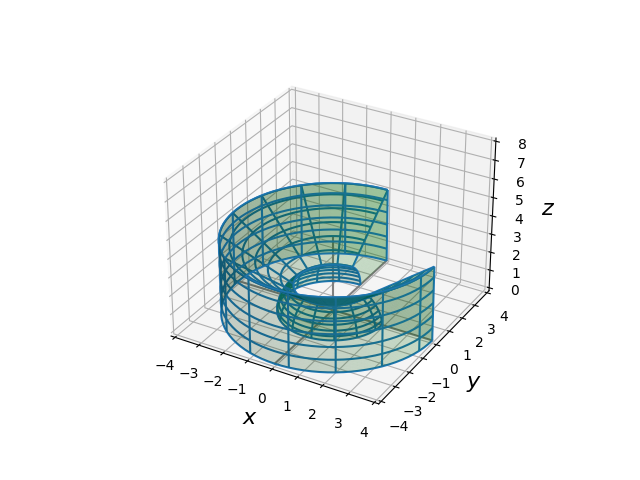

In [3]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([-4,4],[0,0],[0,0],'gray')
    ax.plot([0,0],[-4,4],[0,0],'gray')
    ax.plot([0,0],[0,0],[0,4],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-4,4]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_zlim(0,8)
    
    # ax.set_autoscale_on(True)
    
    u = np.linspace(0,1,100)
    v = np.linspace(1/4,1,70)
    u,v = np.meshgrid(u,v)

    ax.plot_wireframe(2*sin(pi/4 + pi/4*u)*cos(2*pi*v),2*sin(pi/4 + pi/4*u)*sin(2*pi*v),2*cos(pi/4 + pi/4*u),alpha=1,rcount=12,ccount = 6)
    ax.plot_surface(2*sin(pi/4 + pi/4*u)*cos(2*pi*v),2*sin(pi/4 + pi/4*u)*sin(2*pi*v),2*cos(pi/4 + pi/4*u),alpha=.2,color='g')
    ax.plot_wireframe((2+(4*sqrt(2) - 2)*u)*sin(pi/4)*cos(2*pi*v),(2+(4*sqrt(2) - 2)*u)*sin(pi/4)*sin(2*pi*v),(2+(4*sqrt(2) - 2)*u)*cos(pi/4),alpha=1,rcount=12,ccount = 6)
    ax.plot_surface((2+(4*sqrt(2) - 2)*u)*sin(pi/4)*cos(2*pi*v),(2+(4*sqrt(2) - 2)*u)*sin(pi/4)*sin(2*pi*v),(2+(4*sqrt(2) - 2)*u)*cos(pi/4),alpha=.2,color='g')
    ax.plot_wireframe(4*cos(2*pi*v),4*sin(2*pi*v),4*u,alpha=1,rcount=12,ccount = 6)
    ax.plot_surface(4*cos(2*pi*v),4*sin(2*pi*v),4*u,alpha=.2,color='g')
    
    u = np.linspace(0,1,100)
    v = np.linspace(pi/4, pi/2,100)
    u,v = np.meshgrid(u,v)

    ax.plot_surface(((1-u)*2 + u*4/sin(v))*sin(v),0*v,((1-u)*2 + u*4/sin(v))*cos(v),alpha=.2,color='g')
    ax.plot_surface(0*v,((1-u)*2 + u*4/sin(v))*sin(v),((1-u)*2 + u*4/sin(v))*cos(v),alpha=.2,color='g')

    return fig.canvas

a("A Stadium")

In [4]:
# tplquad( lambda rho, phi, theta: rho**2 * sin(phi), 0, 3*pi/2, pi/4, pi/2, 2, lambda theta, phi: 4 / sin(phi))[0]

### APMA E2000

# Lecture 16 - Multiple Integrals/Applications


  - Objectives
    - Applications of integration:
      - Center of mass
      - Moment of inertia
      - Probability
    

  - Resources
    - Content
      - Stewart: §15.4–5
      - New Strang: [§5.6](https://openstax.org/books/calculus-volume-3/pages/5-6-calculating-centers-of-mass-and-moments-of-inertia)
    - Practice
      - [Exercises and Solutions](../exercises/L16-Exercises-Solutions.ipynb)
      - Mooculus: [Mass and Moments](https://ximera.osu.edu/mooculus/calculus3/computationsAndInterpretations/digInMassMomentsAndCenterOfMass)
    - Extras
      - CalcBLUE: [Integrals](https://www.math.upenn.edu/~ghrist/BLUE.html#VOL3) 
      - [Triple Integral Visualizer](https://drew.youngren.nyc/3Demos/iiint/index.html)

<div style="padding-bottom: 40%"></div>

# Applications of Integration

The basic principal behind applying integration is that the desired quantity, the <i>desideratum</i>, is obtained by integrating its <i>elements</i>. Put succinctly,

$$\spadesuit = \int d\spadesuit$$

<p style="padding-bottom:40%;"> </p>

## A Word on Density

"Density" often stands in for mass density which has units of mass/volume, like $\frac{{\rm g}}{{\rm ml}}$. 

But think of it more generally as $$\frac{\rm stuff}{\rm unit\ of\ measure}$$

Further, these can vary continuously throughout a medium or space. Thus, we integrate to find the total amount of "stuff". 

<p style="padding-bottom:40%;"> </p>

### Examples

  - Resistivity $\rho(x)$ along a wire, $\frac{\Omega}{{\rm m}}$. $$\Omega = \int_0^\ell \rho(x)\, dx$$

  - Probability density function $\rho(x,y)$ of two random variables. $$P(E) = \iint_E \rho(x,y)\, dA$$

  - Concentration of chemicals, like $[\text{H}_2\text{CO}_3] = \rho(x,y,z)$. $$\text{total carbonic acid} = \iiint_D \rho(x,y,z)\,dV$$

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

## Masses and Moments

Consider a two mass system in one dimension. That is suppose a mass $m_1$ is at position $x_1$ and mass $m_2$ is at position $x_2$.

The total mass is of course

$$M = m_1 + m_2.$$

The **center of mass** is the point $\bar x$ that balances the torque. That is,

$$m_1(x_1 - \bar x) + m_2(x_2 - \bar x) =0$$

$$\bar x = \frac{m_1x_1 + m_2x_2}{m_1 + m_2}$$

$$ = \frac{m_1}{M}x_1 + \frac{m_2}{M}x_2$$

In [5]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE, figsize=(8,3))
    plt.ion()
    
    slider = FloatSlider(min=0, max = 1, step=.001)
    check = Checkbox(value=True)

    ax.plot([0,1],[0,0],zorder=-1)

    ax.set_xlim(-.1,1.1)
    ax.set_ylim(-.6,.6)
    
    t = linspace(0,1,200)
    
    def update(change):
        xbar = slider.value
        point = check.value
        
        while ax.patches:
            ax.patches.pop()
        
        while ax.collections:
            ax.collections.pop()
        
        if point:
            ax.scatter([1],[0],s=390,zorder=2, color='k')
            ax.scatter([0],[0],s=130, color='k')
            if np.abs(xbar - .75) < .005:
                ax.fill([.75 - .02, .75 + .02, .75], [1/4, 1/4 ,0], color='r')
        else:
            ax.fill_between(t, exp(-16*(t - 2/3)**2)*.4, alpha=.5, color='b')
            if .65 <= xbar <= .66:
                ax.fill([0.6544410013183013 - .02, 0.6544410013183013 + .02, 0.6544410013183013],[1/4, 1/4 ,0], color='white')

        ax.fill([xbar - .02, xbar + .02, xbar],[-1/2, -1/2 ,0], color='g')
    
    update({})
    
    slider.observe(update, names='value')
    check.observe(update, names='value')
    
    return VBox([HBox([slider, check]), fig.canvas])

a("Point Masses")

## Continuous Case

If the mass is spread out with a density function $\mu(x)$ (in mass/length), then the center of mass $\bar{x}$ is the point that gives a 0 moment, i.e. $$\int_a^b (x - \bar{x})\mu(x)\,dx = 0$$ or $$\bar{x} = \frac{\int_a^b x \,\mu(x)\,dx}{\int_a^b \mu(x)\,dx}$$
where the denominator is the total mass. 

<p style="padding-bottom:40%;"> </p>

## Masses and Moments

<img src="https://culinarylore.com/wp-content/uploads/2014/02/waiter-drinks-tray.jpg" width="30%" style="float: right">
                                                                                                                      
<div class="alert alert-block alert-info shadow" style="width: 50%;">
  
<h4>Center of Mass</h4>
  
<p>Let's consider a solid region $\mathcal E$ with continuously varying density (mass per unit volume) $\mu(x,y,z)$. The the <strong>total mass</strong> is given by $$M = \iiint_\mathcal E \mu(x,y,z)\,dV$$ </p>
    
<p>The <strong>center of mass</strong> $(\bar{x},\bar y,\bar z)$ is the "(weighted) average position" of the mass in the object. 

More concisely, 

$$(\bar{x},\bar y, \bar z) = \left(\frac1M \iiint_\mathcal E x \mu(x,y, z)\,dV,\frac1M \iiint_\mathcal E y \mu(x,y, z)\,dV, \frac1M \iiint_\mathcal E z \mu(x,y, z)\,dV\right)$$ 
    
</p>
    
<p style="font-size: 0.75em;">For 2D regions ("laminas"), <a href="https://dictionary.cambridge.org/dictionary/english/mutatis-mutandis">mutatis mutandis</a>. </p>
</div>

<p style="padding-bottom:40%;"> </p>

### Example

Find the center of mass of the unit square $[0,1]\times [0,1]$ whose density is given by $\mu(x,y) = x+2y^2$ 

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()
    
    check = Checkbox(value=False, description="Show c.o.m.")
    show = check.value
    
    x = y = np.linspace(0,1,100)
    x,y = np.meshgrid(x,y)

    cp = ax.pcolormesh(x, y, x+2*y**2, cmap='rainbow', shading='gouraud')
    ax.set_xlim([0,1.1])
    ax.set_ylim([0,1.1])
    fig.colorbar(cp);
    
    
    def update(change):
        show = check.value
        if show:
            ax.scatter([0.5714285714285716], [0.6428571428571429], zorder=2)
        else:
            ax.collections.pop()
    
    check.observe(update, names='value')
    
    return VBox([check, fig.canvas])

a("Nonuniform Density")

#### Solution

In [7]:
M = dblquad(lambda y,x: x+2*y**2,0,1,0,1)[0]

In [8]:
xbar = 1/M*dblquad(lambda y,x: (x+2*y**2)*x,0,1,0,1)[0]

ybar = 1/M*dblquad(lambda y,x: (x+2*y**2)*y,0,1,0,1)[0]
(xbar, ybar), M

((0.5714285714285715, 0.6428571428571428), 1.1666666666666667)

####
<p style="padding-bottom:40%;"> </p>

### Example

The nose of a race car is modeled by half of a right cone with height $h$ and radius $R$. Assuming uniform density, how high is the center of mass from the bottom. 

In [24]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([0,3],[0,0],[0,0],'gray')
    ax.plot([0,0],[-3/2, 3/2],[0,0],'gray')
    ax.plot([0,0],[0,0],[0,3],'gray')   

    for c in 'xyz':
        # getattr(ax,f"set_{c}lim")([0,4]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    # ax.set_autoscale_on(True)
    
    u = linspace(0,3,300)
    v = linspace(0, pi, 300)
    
    u,v = meshgrid(u,v)
    
    ax.plot_surface(u, u/3*cos(v), u/3*sin(v), color='b', alpha=.4)
    ax.plot_wireframe(u, u/3*cos(v), u/3*sin(v), color='k',rcount=5, ccount=5)
    ax.plot_surface(0*u + 3, u/3*cos(v), u/3*sin(v), color='b', alpha=.4)
    ax.plot_wireframe(0*u + 3, u/3*cos(v), u/3*sin(v), color='k',rcount=5, ccount=5)  
    
    check = Checkbox(description="c.o.m.", value=False)
    
    def update(change):
        if check.value:
            ax.scatter([2.25], [0], [1/pi], s=50, color='orange')
        else:
            ax.collections.pop()
    
    check.observe(update, names='value')
    
    return VBox([check, fig.canvas])

a("A nose cone")

#### Solution

\begin{align*}
    x &= x \\
    y &= r \cos \theta \\
    z &= r \sin \theta
\end{align*}

$$\bar z = \frac{6}{\pi R^2 h} \int_0^\pi \int_0^h \int_0^{Rx/h} r^2 \sin \theta \, dr\,dx\,d\theta$$

$$ = \frac{2R}{\pi h^4} \int_0^\pi \int_0^h x^3 \sin \theta \,dx\,d\theta$$

$$ = \frac{R}{2\pi} \int_0^\pi \sin \theta \,d\theta = \frac{R}{\pi}$$

####
<div style="padding-bottom: 40%"></div>

## Moment(s) of Inertia

<img src="http://giphygifs.s3.amazonaws.com/media/RmuN3xF9sBpL2/giphy.gif" alt="Figure skater spinning" style="float: right;">

The **moment of inertia** $I$ of a massive body is a measure of its "resistance to rotation" about a given axis. 

Angular momentum is  $L=I\omega$, the product of the moment of inertia and the angular velocity.



The figure skater pulls her body in to reduce her moment of intertia. As angular momentum is conserved, she spins faster.

<p style="padding-bottom:40%;"> </p>

### Formula

$I$ is a measurement of how far the mass is spread from the axis. It is the second moment of the density distribution. 

If we take a body $\mathcal D$ in the plane with area density $\mu(x,y)$, and consider it rotating about the origin, then

$$ I = \iint_\mathcal D (x^2+y^2)\mu (x,y)\,dA $$

that is, the distance to the axis squared, weighted by mass. 


<p style="padding-bottom:40%;"> </p>

#### Exercise

Let's compute the moment of inertia of the square above about:
  - the origin
  - the $y$-axis

#### Solution

In [10]:
Iz = dblquad(lambda y,x: (x**2 + y**2)*(x + 2*y**2),0,1,0,1)[0]
Iz

1.038888888888889

In [11]:
Iy = dblquad(lambda y,x: (x**2)*(x + 2*y**2),0,1,0,1)[0]

In [12]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    x = linspace(0,1)
    x,y = meshgrid(x,x)
    
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    # ax.set_autoscale_on(True)
    
    slider = FloatSlider(min=0, max = 2*Iz, step=0.01*Iz)

    
    def update(change):
        t = slider.value
        while ax.collections:
            ax.collections.pop()
        ax.plot_surface(x*cos(2*pi*t/Iz) - y*sin(2*pi*t/Iz),x*sin(2*pi*t/Iz) + y*cos(2*pi*t/Iz),0*x, color='orange', alpha=.6)
        ax.plot_surface(x*cos(2*pi*t/Iy),y,x*sin(2*pi*t/Iy), color='purple', alpha=.6)
    
    update({})
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("$I$ for square")

####
<p style="padding-bottom:40%;"> </p>

# Probability

Two (real) random variables $X$ and $Y$ have a joint probability density function $\mu(x,y)$. This is simply a function on the plane with $\mu(x,y) \geq 0$ and 

$$\iint_{\RR^2} \mu(x,y)\,dA = 1.$$

An **event** $E \subset \RR^2$ is just a subset of the sample space, and its probability is 

$$P(E) = \iint_E \mu(x,y)\,dA$$.

<p style="padding-bottom:40%;"> </p>

## Example

What is the probability that 2 numbers randomly chosen between 0 and 1 have a product greater than $\frac12$?

#### Solution

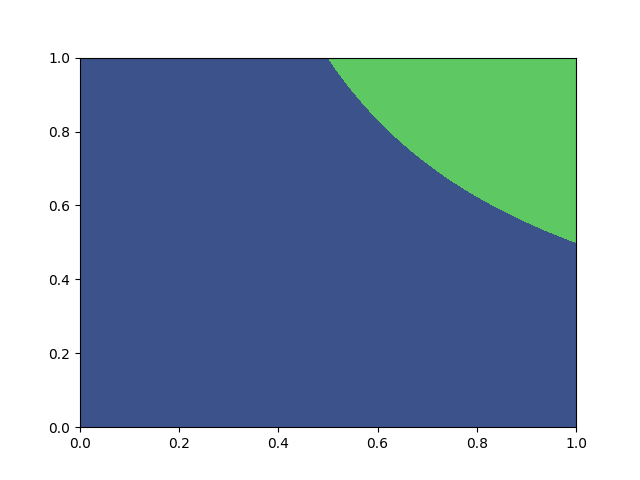

In [13]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()
    x = y = np.linspace(0,1,50)
    x,y = np.meshgrid(x,y)
    ax.contourf(x,y,x*y ,levels=[0,1/2,1]);
    
    return fig.canvas

a("A probability")

In [14]:
dblquad(lambda y, x: 1, 1/2, 1, lambda x: 1/(2*x), 1)[0]

0.15342640972002736

####
<p style="padding-bottom:40%;"> </p>

## The Moments 

Moment measurements have analogous meaning in the probability context.

The "center of mass" is in fact the **expected value** of the variables.

$$(\bar{x},\bar{y}) = \left( \iint_{\RR^2} x \rho(x,y)\,dA,\iint_{\RR^2} y \rho(x,y)\,dA\right) $$

The second moments (relative to this center) give the **variances** of the respected variables. 

$$(\sigma_x^2,\sigma_{y}^2) = \left( \iint_{\RR^2} (x-\bar{x})^2 \rho(x,y)\,dA,\iint_{\RR^2} (y-\bar{y})^2 \rho(x,y)\,dA\right) $$

The list goes on 

  - mixed moments $\to$ covariance
  - 3rd moments $\to$ skewedness
  - 4th moments $\to$ kurtosis
  - $\ldots$

<p style="padding-bottom:40%;"> </p>

## More Examples

Find an expression for the moment of inertia $I$ (about a centric axis) in terms of the total mass $M$ (with uniform density) for the following shapes:

  - Cube with side $2R$. 
  - Right cone with base radius $R$ and height $h$.
  - Half-ball with radius $R$. 

<p style="padding-bottom:40%;"> </p>

#### Solutions

  - cube: $\frac23 MR^2$
  - cone: $\frac{3}{10} MR^2$
  - half-ball: $\frac25 MR^2$